In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1022)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

#feature importance

model.feature_importances_
pd.DataFrame({'feature':x_train.columns,
             'importance':model.feature_importances_})


1.0


,feature,importance
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
2,petal length (cm),0.295187
3,petal width (cm),0.704813


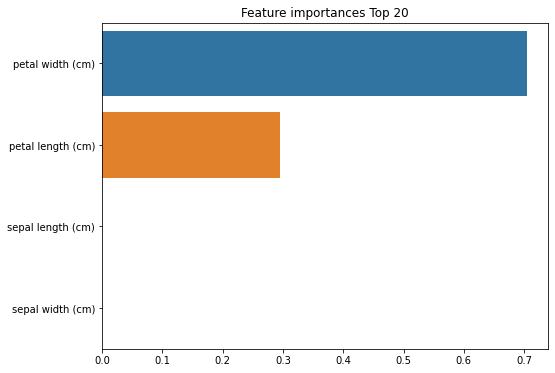

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

dt_importances_values = model.feature_importances_
dt_importances = pd.Series(data = dt_importances_values, index = x_train.columns)
dt_importances
dt_top20 = dt_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = dt_top20, y = dt_top20.index)
plt.show()
# a = dt_importances.reset_index()
# a.rename({'index' : 'features',0:'importances'},axis = 1, inplace = True)


<AxesSubplot:xlabel='features', ylabel='importances'>

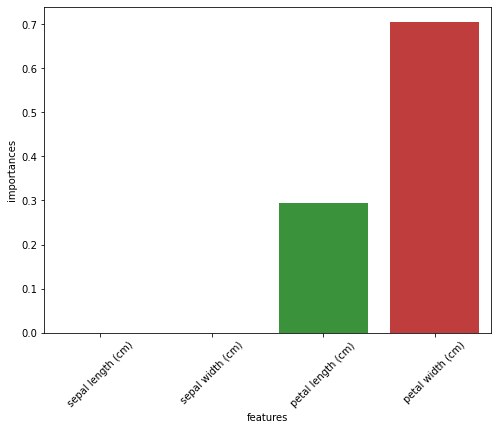

In [46]:
plt.figure(figsize = (8,6))
plt.xticks(rotation = 45)
sns.barplot(data = a,x = 'features', y = 'importances')

In [60]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

data_df = pd.DataFrame(data = X, columns = cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1022
                                                   )
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)

confusion = confusion_matrix(y_test, pred)
print(confusion)
print(accuracy)
print(classification_report(y_test, pred))

[[43  3]
 [ 5 63]]
0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.95      0.93      0.94        68

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 10)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[40  6]
 [ 1 67]]
0.9385964912280702
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.92      0.99      0.95        68

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [77]:
rf_clf.feature_importances_
rf_clf_importance_features = pd.Series(data = rf_clf.feature_importances_, index = cancer.feature_names)
rf_clf_importance_features_top20 = rf_clf_importance_features.sort_values(ascending = False)[:20]


<AxesSubplot:>

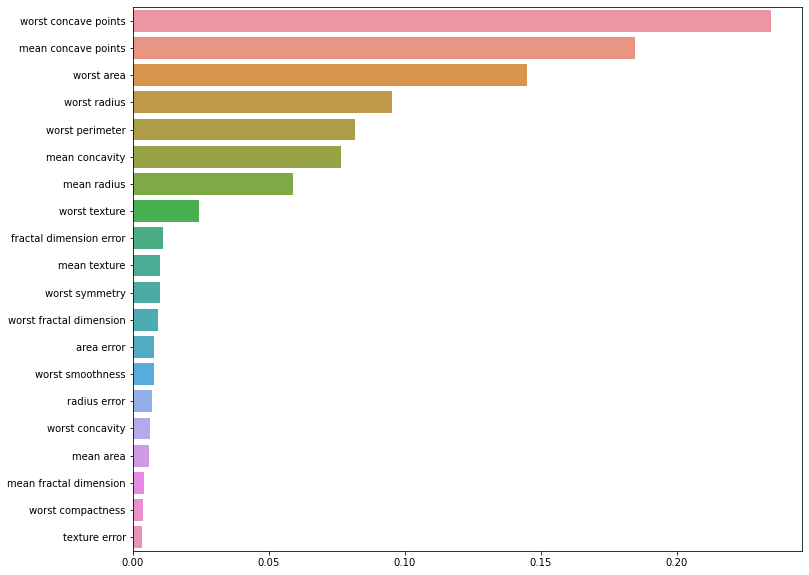

In [81]:
plt.figure(figsize = (12,10))
sns.barplot(x = rf_clf_importance_features_top20, y = rf_clf_importance_features_top20.index)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GBM = GradientBoostingClassifier()
clf_GBM.fit(X_train, y_train)
pred = clf_GBM.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9385964912280702
[[41  5]
 [ 2 66]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.93      0.97      0.95        68

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [96]:
gbm_importance_values = clf_GBM.feature_importances_
gbm_importance_values
gbm_importance_values_series = pd.Series(data = gbm_importance_values, index = cancer.feature_names)
gbm_importance_values_series_top20 = gbm_importance_values_series.sort_values(ascending = False)[:20]
gbm_importance_values_series_top20

worst concave points       0.547315
mean concave points        0.206584
worst area                 0.053486
worst texture              0.048907
worst radius               0.045859
concavity error            0.024910
mean texture               0.014041
worst perimeter            0.013280
worst concavity            0.011213
radius error               0.005174
perimeter error            0.004725
texture error              0.003927
concave points error       0.003146
symmetry error             0.003110
worst fractal dimension    0.002967
area error                 0.002904
worst compactness          0.002578
worst smoothness           0.002275
mean area                  0.001203
fractal dimension error    0.000670
dtype: float64

<AxesSubplot:>

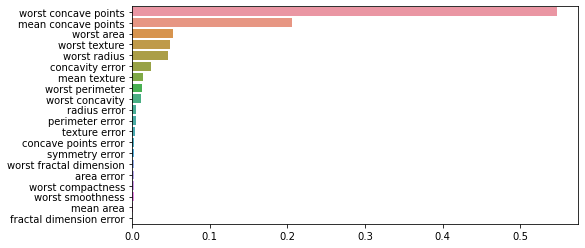

In [100]:
plt.figure(figsize = (8,4))
sns.barplot(x = gbm_importance_values_series_top20, y = gbm_importance_values_series_top20.index)